## Stock Prediction using Deep Learning

In [1]:
# import libraries 
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt   
import plotly.graph_objects as go
import yfinance as yf

In [2]:
def get_data(stock_name, indian='yes'):
    # indian = input("Is it an Indian stock (Yes/No) :").lower()

    stock_name = stock_name.upper()
    if indian == 'yes': 
        stock_name = stock_name + ".NS"
        stock_data = yf.download(stock_name, start='2010-01-01', end='2023-01-01')
        stock_data.reset_index(inplace=True)
        return stock_data 
    elif indian == 'no': 
        stock_data = yf.download(stock_name, start='2010-01-01', end='2023-01-01')
        stock_data.reset_index(inplace=True)
        return stock_data
    else:
        return "Incorrect input"
    
# stock_data = get_data('tcs','yes') 
# stock_data

In [3]:
tcs = get_data('tcs','yes')
t_mahindra = get_data('techm','yes')
wipro = get_data('wipro','yes')
# ltts = get_data('ltts','yes')
hdfc = get_data('hdfcbank','yes')
reliance = get_data('reliance','yes')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Raw Stock Price Visualisation

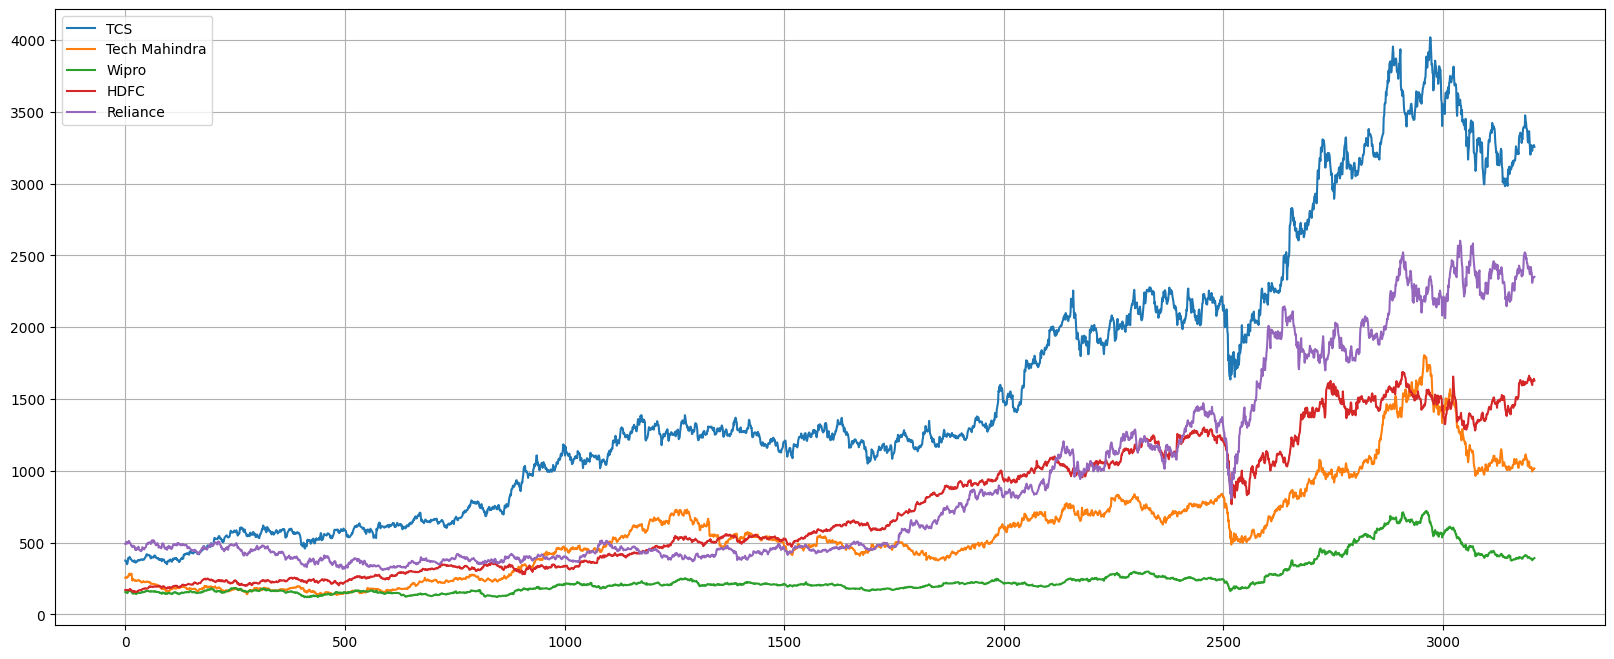

In [4]:
plt.figure(figsize=[20,8])
plt.plot(range(tcs.shape[0]), tcs['Close'], label='TCS')
plt.plot(range(t_mahindra.shape[0]), t_mahindra['Close'], label='Tech Mahindra')
plt.plot(range(wipro.shape[0]), wipro['Close'], label='Wipro')
# plt.plot(range(ltts.shape[0]), ltts['Close'], label='L&T Tech. Services')
plt.plot(range(hdfc.shape[0]), hdfc['Close'], label='HDFC')
plt.plot(range(reliance.shape[0]), reliance['Close'], label='Reliance'); 
plt.title("")
plt.grid()
plt.legend(); 


### Kalman Filtered Price Fluctuation

In [5]:
# def price_fluct(list_of_stocks):
    
#         kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
#                          initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
#         for company in list_of_stocks:
#             num = 0
#             mean, cov = kf.filter(company['Adj Close'].values)
#             mean, std = mean.squeeze(), np.std(cov.squeeze())
#             plt.subplot(len(list_of_stocks), 1, num+1)
#             plt.figure(figsize=(12,8))
#             plt.plot(company['Adj Close'].values - mean, 'red', lw=1.5)
#             # plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
#             # plt.title("Kalman filtered price fluctuation")
#             # plt.ylabel("Deviation from the mean ($)")
#             # plt.xlabel("Days")
#             num += 1

In [6]:
# To plot the Kalman filtered price fluctuation
def price_fluct(company):
    
        kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                         initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
        mean, cov = kf.filter(company['Adj Close'].values)
        mean, std = mean.squeeze(), np.std(cov.squeeze())
        plt.figure(figsize=(14,4))
        plt.plot(company['Adj Close'].values - mean, 'red', lw=1.5)
        plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
        plt.title("Kalman filtered price fluctuation")
        plt.ylabel("Deviation from the mean ($)")
        plt.grid()
        plt.xlabel("Days")

# Interactive candlestick visualisation of the company's stock data 
def candlestick_viz(company):
    
    fig = go.Figure(data=[go.Candlestick(x=company['Date'],open=company['Open'],high=company['High'],
                low=company['Low'], close=company['Close'])])

    fig.show()

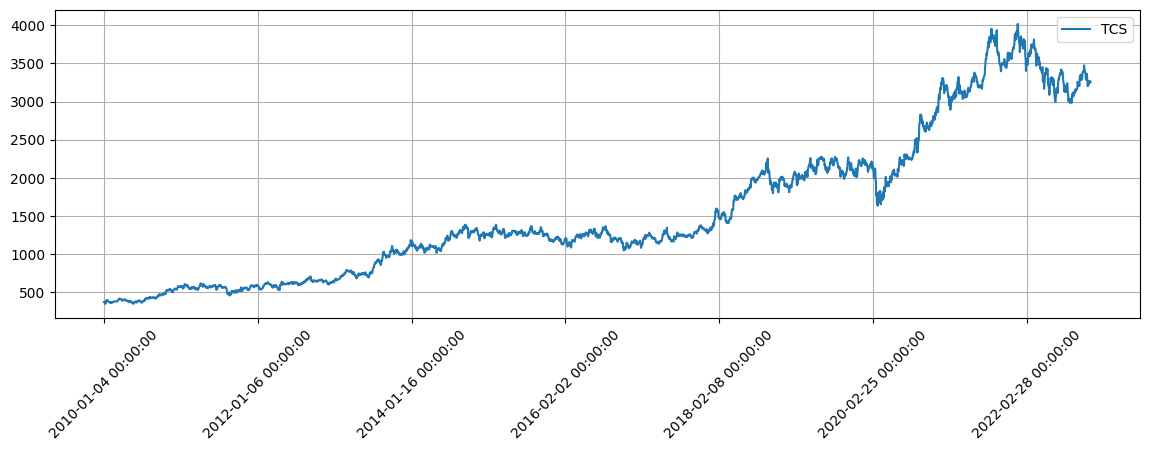

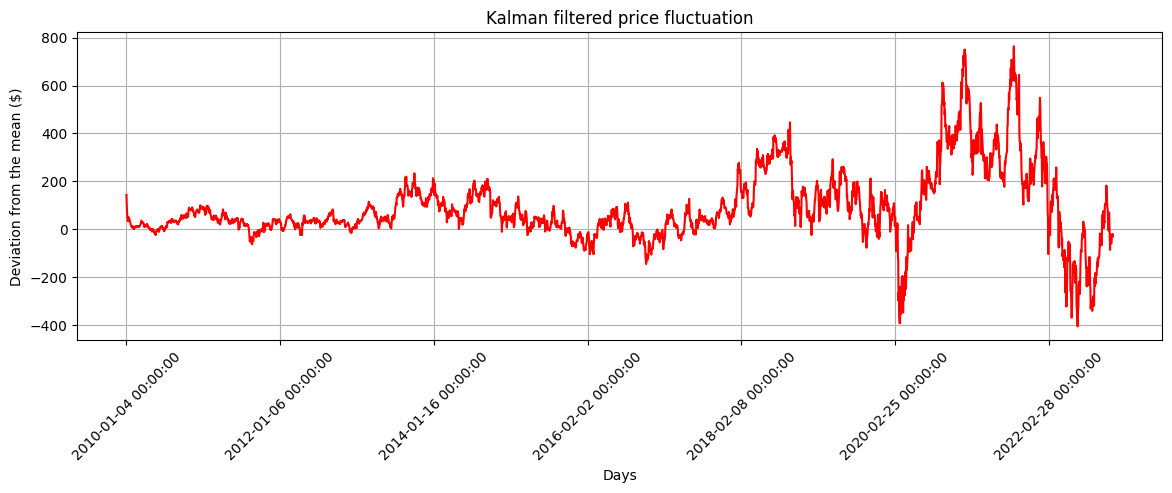

In [7]:
# Visualising raw stock price of TCS alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])
# plt.subplot(2,1,1)
plt.plot(range(tcs.shape[0]), tcs['Close'], label='TCS')
plt.xticks(range(0,tcs.shape[0],500),tcs['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
# plt.subplot(2,1,2)
price_fluct(tcs)

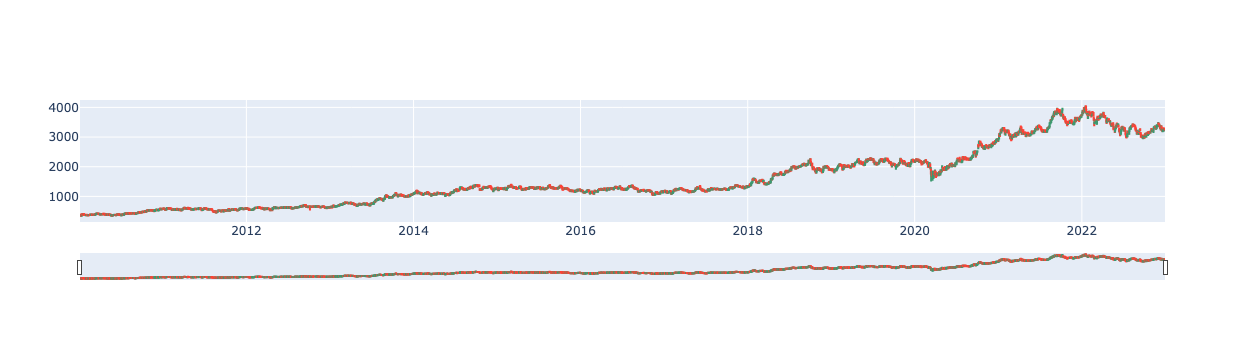

In [8]:
# Candlestick visualisation of TCS

candlestick_viz(tcs)

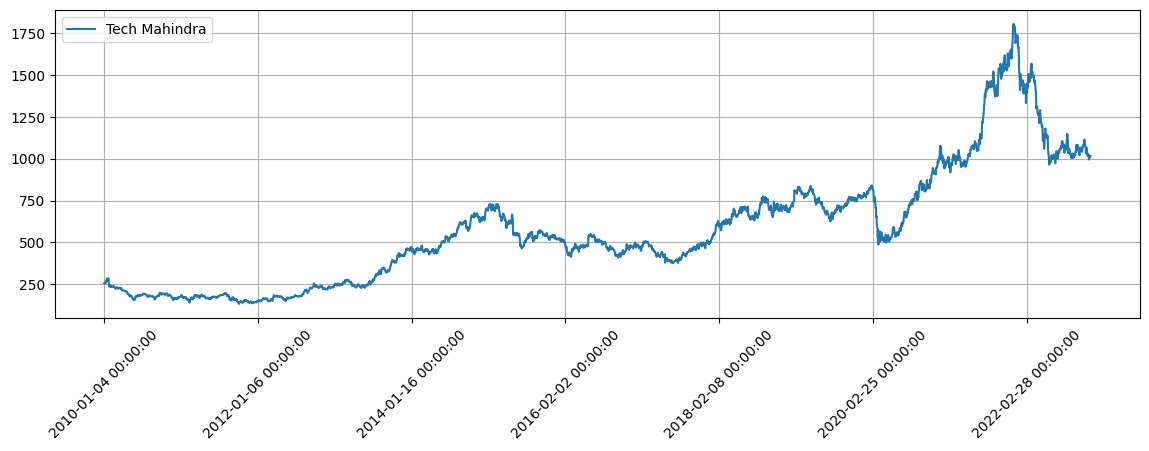

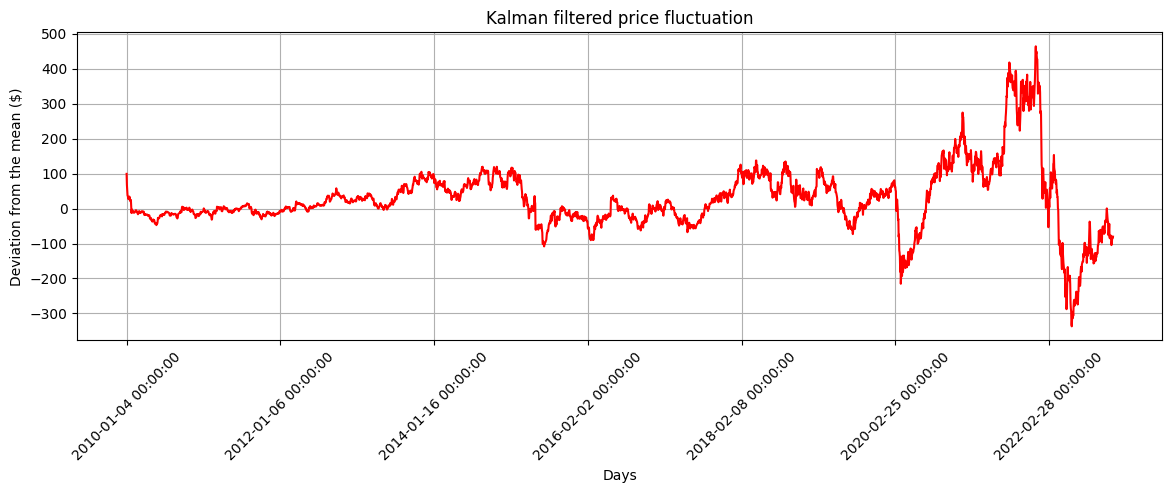

In [9]:
# Visualising raw stock price of Tech Mahindra alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(t_mahindra.shape[0]), t_mahindra['Close'], label='Tech Mahindra')
plt.xticks(range(0,t_mahindra.shape[0],500),t_mahindra['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(t_mahindra)

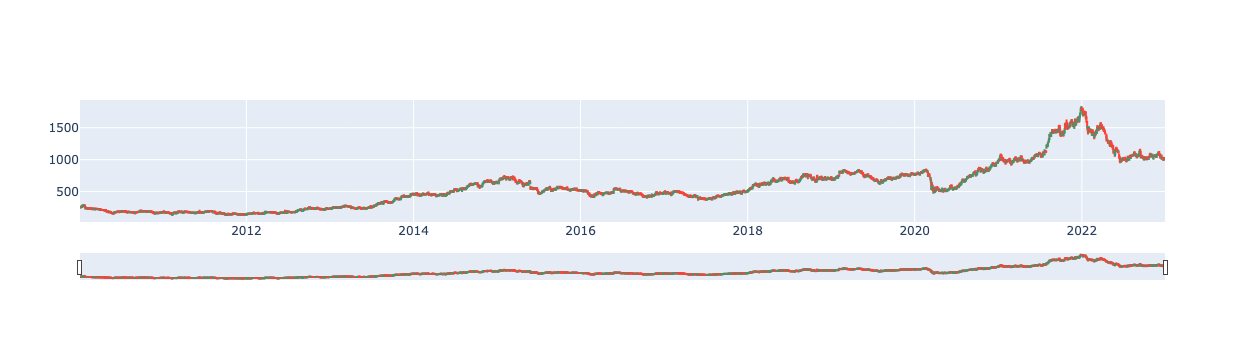

In [10]:
# Candlestick visualisation for Tech Mahindra 
candlestick_viz(t_mahindra)

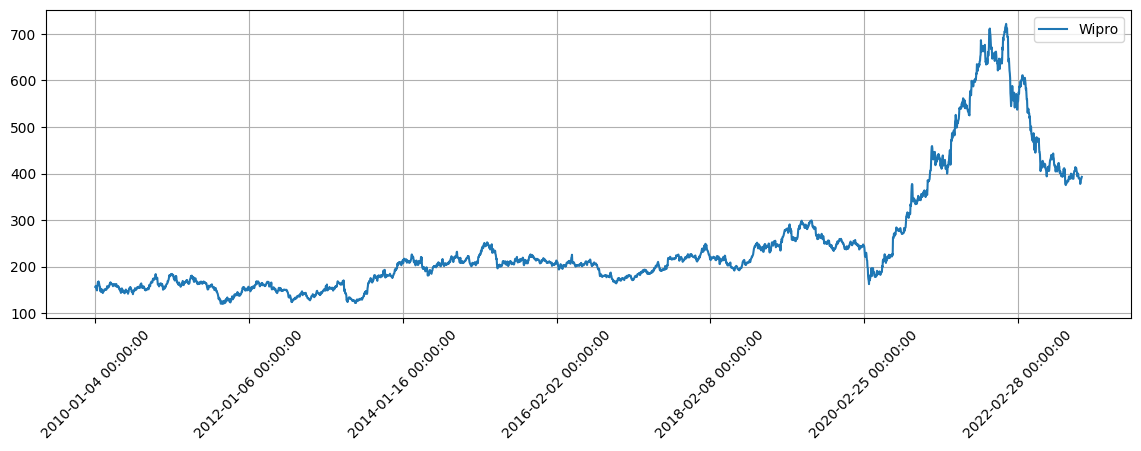

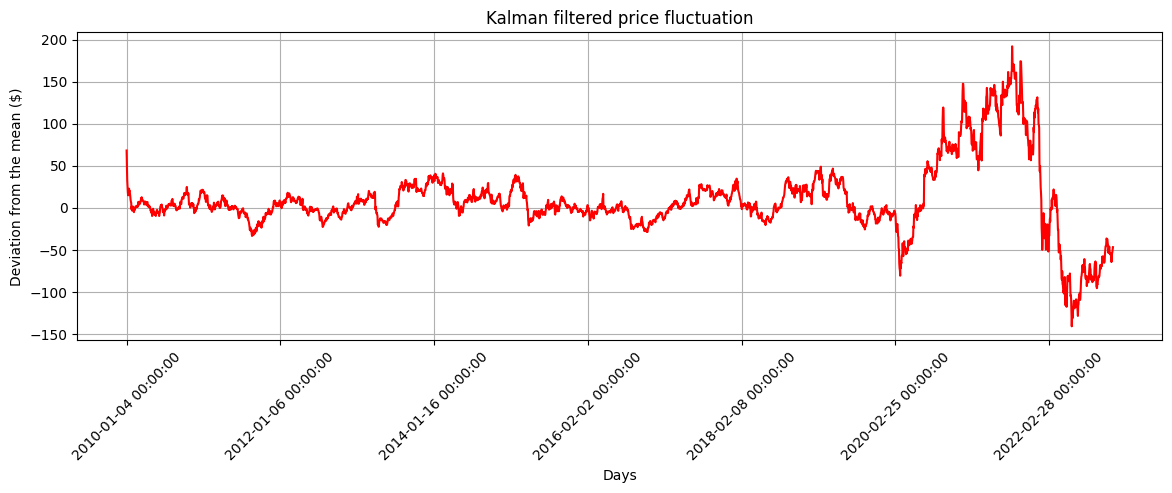

In [11]:
# Visualising raw stock price of Wipro alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(wipro.shape[0]), wipro['Close'], label='Wipro')
plt.xticks(range(0,wipro.shape[0],500),wipro['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(wipro)

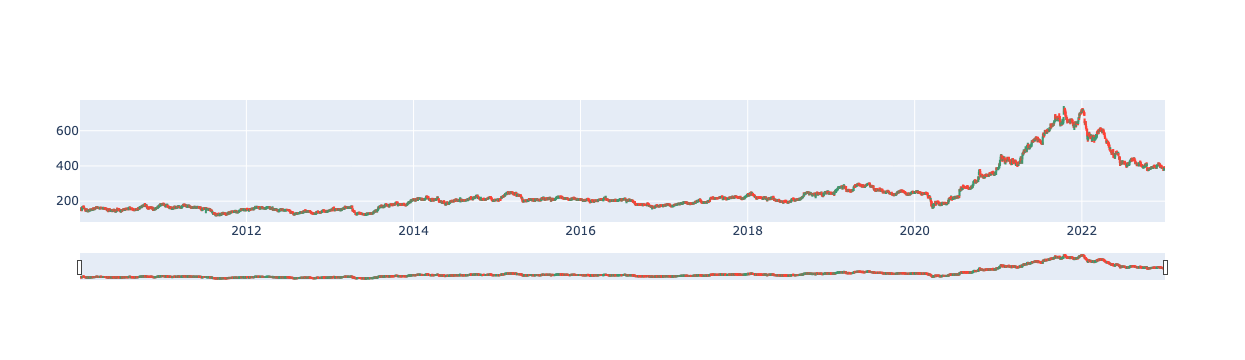

In [12]:
# Candlestick Visualisation of Wipro
candlestick_viz(wipro); 

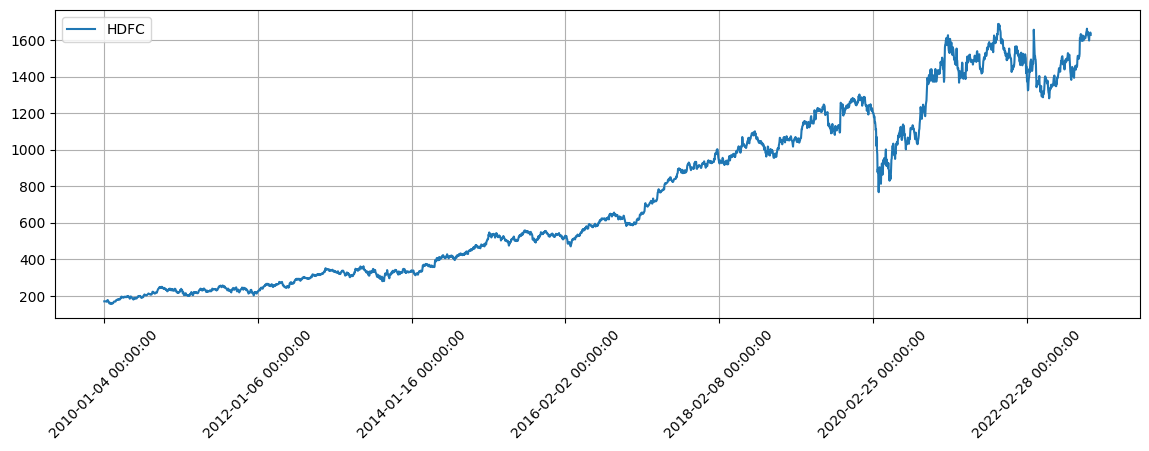

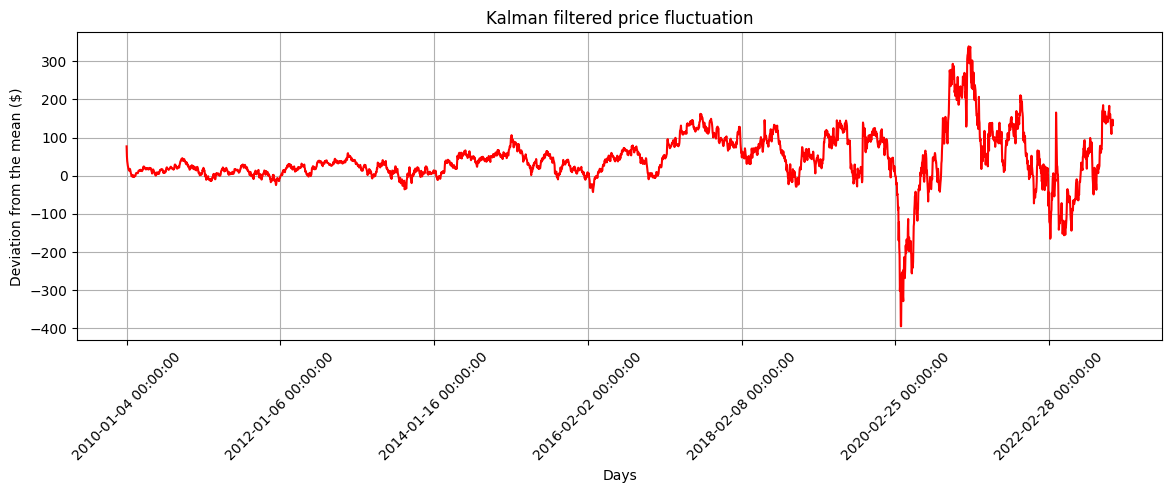

In [13]:
# Visualising raw stock price of HDFC alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(hdfc.shape[0]), hdfc['Close'], label='HDFC')
plt.xticks(range(0,hdfc.shape[0],500),hdfc['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(hdfc)

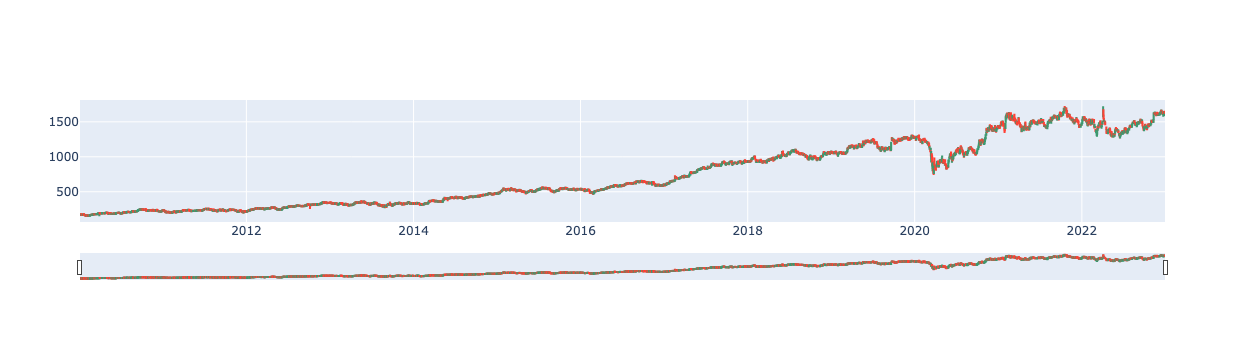

In [14]:
# Candlestick visualisation for HDFC
candlestick_viz(hdfc)

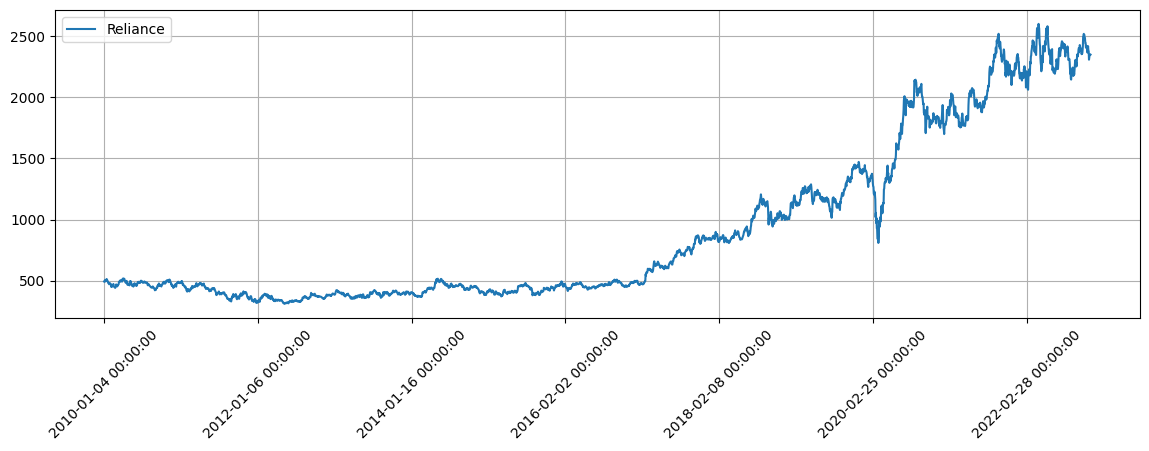

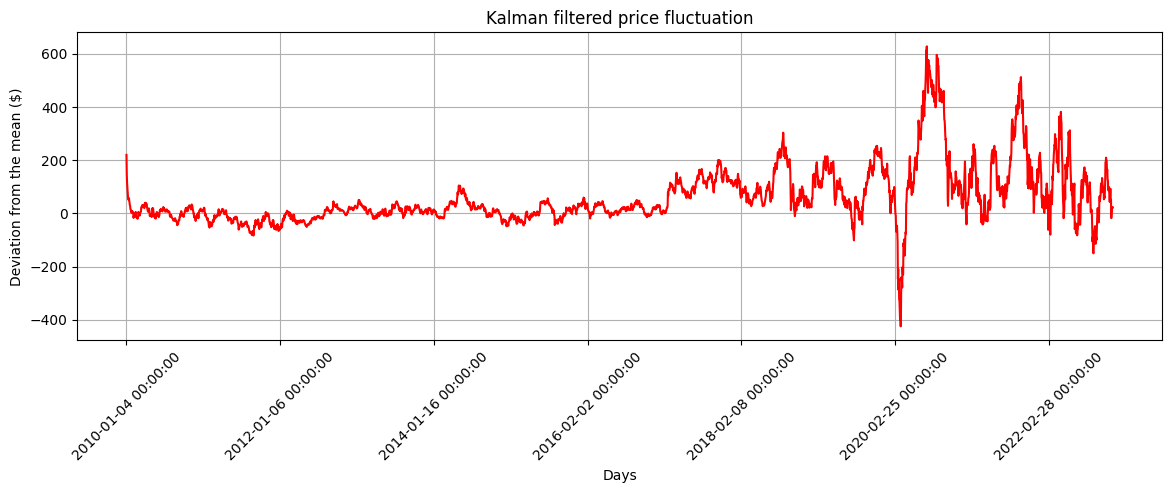

In [15]:
# Visualising raw stock price of Reliance alongside the Kalman filtered price fluctuation 

plt.figure(figsize=[14,4])

plt.plot(range(reliance.shape[0]), reliance['Close'], label='Reliance')
plt.xticks(range(0,reliance.shape[0],500),reliance['Date'].loc[::500],rotation=45)
plt.legend()
plt.grid()
price_fluct(reliance)

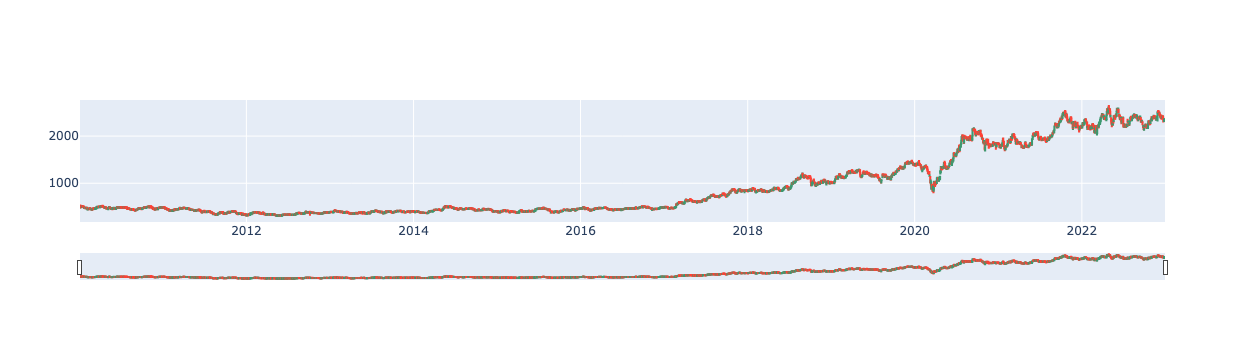

In [16]:
# Candlestick visualisation for Reliance 
candlestick_viz(reliance)

### Deep Learning Models

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation,SimpleRNN
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from pykalman import KalmanFilter
import plotly.graph_objects as go
from datetime import datetime
tf.random.set_seed(7)


In [19]:
# tcs.values
# len(tcs)
# a = []
# b = []
# for i in range(60, len(tcs)):
#     a.append(tcs[i-60:i, 0])
#     b.append(tcs[i, 0])
# tcs['Date'].values

In [20]:
class stock_predict_DL: 

    def __init__(self, company_dataframe):
        data = company_dataframe.filter(['Open']) # Taking only the opening prices for prediction 
        dataset = data.values 
        # training = 90% , testing = 10%
        training_data_len = int(np.ceil(len(dataset)*0.90)) # The ceil() function rounds up floating point element(s) in an array to the nearest integer greater than or equal to the array element

        # scaling the open prices to in between (0,1)
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(dataset)
        train_data = scaled_data[0:int(training_data_len), :]
        # splitting the training data into self.X_train and self.y_train data sets 
        self.X_train = []
        self.y_train = []

        # Predicting prices based on the 'open' price movement of the last 60 days 
        for i in range(60, len(train_data)): 
            self.X_train.append(train_data[i-60:i, 0])
            self.y_train.append(train_data[i,0])
        
        # Converting self.X_train and self.y_train to numpy arrays 
        self.X_train, self.y_train = np.array(self.X_train), np.array(self.y_train)

        # Create the testing data set 
        test_data = scaled_data[training_data_len - 60: , :]
        self.X_test = []
        self.y_test = dataset[training_data_len : , :] # Remaining 10% of the data for testing 
        for i in range(60, len(test_data)): 
            self.X_test.append(test_data[i-60:i, 0])

        self.X_test = np.array(self.X_test) 
        test_dates = company_dataframe['Date'].values
        self.test_d = test_dates[training_data_len:] # stores the test dates 

        # List to store the r2 score of all the models to get the best model at the end 
        self.model_score = []

    def LSTM_model(self):
        
        print("Long Short-Term Memory (LSTM)")
        Xtrain = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1)) # reshaping the data
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1))

        # Building the LSTM model 
        model = Sequential()
        model.add(LSTM(units=128, return_sequences=True, input_shape=(Xtrain.shape[1], 1)))
        model.add(Dropout(0.2)) # adding dropout to reduce overfitting
        model.add(LSTM(units=50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(units=32))
        model.add(Dropout(0.2))
        model.add(Dense(units=1))

        # Compiling the model 
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Training the model 
        model.fit(Xtrain, self.y_train, batch_size=1, epochs=1)

        predictions = model.predict(Xtest)
        predictions = self.scaler.inverse_transform(predictions)

        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, predictions))
        self.model_score.append(["LSTM",metrics.r2_score(self.y_test, predictions)])        

        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, predictions))
        plt.figure(figsize=[15,7])
        plt.plot(predictions)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])

        # plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("LSTM")        

    def basic_ann_model(self):
        print("Basic Artifical Neural Network ")

        classifier = Sequential()
        
    

    

In [21]:
company_stock = stock_predict_DL(tcs)

Long Short-Term Memory (LSTM)


/Users/ritwik/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2829/2829 ━━━━━━━━━━━━━━━━━━━━ 57s 20ms/step - loss: 0.0059
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R2 SCORE
0.9087480150176596
MSLE
0.00048704628799759635


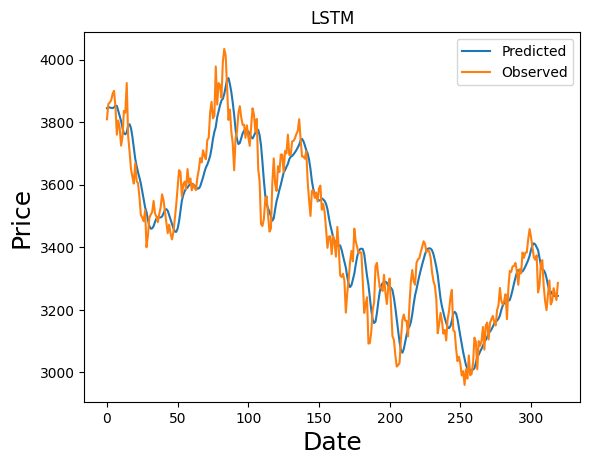

In [22]:
# company_stock
company_stock.LSTM_model()